2022.11.09.

1. first 실습

2. 노드 개수 계산하는거 문제

* CS(computersiensss) 231

------

손 글씨 분류

파이토치 라이브러리. 토치비전 같은건 데이터 다운 패키지.


0번째는 이미지. 1번째는 정답.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datasetPath="/content/drive/MyDrive/machine_learning/dataset"
parameterPath="/content/drive/MyDrive/machine_learning/parameters"

#SLP(Single-Layer Perceptron)

##packge

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dataset
import torchvision.transforms as transform
from torch.utils.data import DataLoader

##Dataset

In [ ]:
#Training dataset 다운로드
mnist_train = dataset.MNIST(root = datasetPath,
                            train=True,
                            transform = transform.ToTensor(),
                            download=True)
#Testing dataset 다운로드
mnist_test = dataset.MNIST(root = datasetPath,
                            train=False,
                            transform = transform.ToTensor(),
                            download=True
)

##MNIST dataset check

60000
torch.Size([1, 28, 28])
5


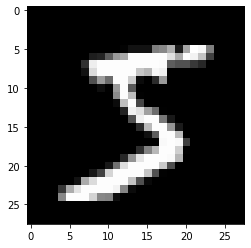

In [ ]:
import matplotlib.pyplot as plt
print(len(mnist_train)) # training dataset 개수 확인

first_data=mnist_train[0]
print(first_data[0].shape) # 첫번째 data 형상 확인  1*28*28
print(first_data[1]) # 첫번째 data 정답 확인

plt.imshow(first_data[0][0,:,:], cmap='gray')
plt.show()

perceptron의 각 노드는 한 번에 1개의 값을 입력 받을 수 있다.

따라서 2D 형태 이미지의 전처리가 필요하다. -> 이미지 평탄화(28*28=784개)

In [ ]:
first_img = first_data[0]
print(first_img.shape)

first_img = first_img.view(-1,28*28)#img 평탄화 수행 2D -> 1D
print(first_img.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])


##SLP model define

In [ ]:
class SLP(nn.Module):
  def __init__(self):
    super(SLP,self).__init__()
    self.fc = nn.Linear(in_features=784, out_features=10) # input num : 784, output num : 10
  def forward(self, x):
    x = x.view(-1, 28*28) # img 평탄화
    y = self.fc(x)
    return y

##Hyper-parameters 지정

In [ ]:
batch_size = 100
learning_rate = 0.1
training_epochs = 15
loss_function = nn.CrossEntropyLoss()
network = SLP()
optimizer = torch. optim.SGD(network.parameters(), lr = learning_rate)#GD

#batch 단위 학습을 위해 DataLoader 함수를 사용
data_loader = DataLoader(dataset = mnist_train,
                         batch_size = batch_size,
                         shuffle=True,
                         drop_last=True)

##Training

In [ ]:
for epoch in range(training_epochs): #전체 데이터에 대한 반복 : epoch
  avg_cost=0
  total_batch = len(data_loader)

  for img, label in data_loader: # 1 epoch 내의 배치에 대한 반복 : iteration
    pred = network(img)#입력 이미지에 대해forward pass
    loss = loss_function(pred, label)#예측 값, 정답을 이용해 loss 계산
    optimizer.zero_grad()#gradient init
    loss.backward()#모든 weight에 대해 편미분 값 계산. 역전파
    optimizer.step()#파라미터 업데이트

    avg_cost+= loss/ total_batch # 모든 배치에 대한 평균 loss 값 계산
  
  print("Epoch: %d Loss = %f"%(epoch++1, avg_cost))
print("Learning Finished")

Epoch: 1 Loss = 0.535373
Epoch: 2 Loss = 0.359363
Epoch: 3 Loss = 0.331237
Epoch: 4 Loss = 0.316358
Epoch: 5 Loss = 0.307096
Epoch: 6 Loss = 0.300278
Epoch: 7 Loss = 0.294839
Epoch: 8 Loss = 0.290809
Epoch: 9 Loss = 0.287374
Epoch: 10 Loss = 0.284247
Epoch: 11 Loss = 0.281760
Epoch: 12 Loss = 0.279656
Epoch: 13 Loss = 0.277714
Epoch: 14 Loss = 0.275887
Epoch: 15 Loss = 0.274447
Learning Finished


##Test

In [ ]:
with torch.no_grad(): # test에서는 기울기 계산 제외
  img_test = mnist_test.data.float()
  label_test = mnist_test.targets

  prediction = network(img_test)#전체 test data를 한번에 계산
  correct_prediction = torch.argmax(prediction,1)==label_test #예측 값이 가장 높은 숫자(0~9)와 정답 데이터가 일치한 지 확인
  accuracy = correct_prediction.float().mean()
  print("Accuracy : ", accuracy.item())

Accuracy :  0.8885999917984009


#MLP(Multi-Layer Perceptron)

##packge

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dataset
import torchvision.transforms as transform
from torch.utils.data import DataLoader

##Dataset

In [ ]:
#Training dataset
mnist_train = dataset.MNIST(root = datasetPath,
                            train=True,
                            transform = transform.ToTensor(),
                            download=True)
#Testing dataset
mnist_test = dataset.MNIST(root = datasetPath,
                            train=False,
                            transform = transform.ToTensor(),
                            download=True
)

##MNIST dataset check

60000
torch.Size([1, 28, 28])
5


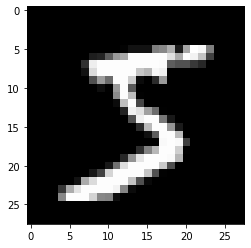

In [ ]:
import matplotlib.pyplot as plt
print(len(mnist_train))

first_data=mnist_train[0]
print(first_data[0].shape)
print(first_data[1])

plt.imshow(first_data[0][0,:,:], cmap='gray')
plt.show()

In [ ]:
first_img = first_data[0]
print(first_img.shape)

first_img = first_img.view(-1,28*28)#img 평탄화
print(first_img.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])


##MLP model defin

In [ ]:
class MLP(nn.Module): #2-layer
  def __init__(self):
    super(MLP,self).__init__()
    self.fc1 = nn.Linear(in_features=784, out_features=100)#fc1의 출력 노드 개수와 fc2의 입력 노드 개수 반드시 동일
    self.fc2 = nn.Linear(in_features=100, out_features=10)
    self.sigmoid = nn.Sigmoid()#relu 쓸려면 nn.ReLU()

  def forward(self, x):
    x = x.view(-1, 28*28)
    y = self.sigmoid(self.fc1(x))
    y = self.fc2(y)
    return y

##Hyper-parameters

In [ ]:
batch_size = 100
learning_rate = 0.1
training_epochs = 15
loss_function = nn.CrossEntropyLoss()
network = MLP()
optimizer = torch. optim.SGD(network.parameters(), lr = learning_rate)#GD

data_loader = DataLoader(dataset = mnist_train,
                         batch_size = batch_size,
                         shuffle=True,
                         drop_last=True)

##Training

In [ ]:
for epoch in range(training_epochs):
  avg_cost=0
  total_batch = len(data_loader)

  for img, label in data_loader:
    pred = network(img)
    loss = loss_function(pred, label)
    optimizer.zero_grad()#gradient init
    loss.backward()#back Pa
    optimizer.step()

    avg_cost+= loss/ total_batch
  
  print("Epoch: %d Loss = %f"%(epoch++1, avg_cost))
print("Learning Finished")

Epoch: 1 Loss = 1.155186
Epoch: 2 Loss = 0.448009
Epoch: 3 Loss = 0.359817
Epoch: 4 Loss = 0.323254
Epoch: 5 Loss = 0.300971
Epoch: 6 Loss = 0.284256
Epoch: 7 Loss = 0.270063
Epoch: 8 Loss = 0.257503
Epoch: 9 Loss = 0.246360
Epoch: 10 Loss = 0.235989
Epoch: 11 Loss = 0.226467
Epoch: 12 Loss = 0.217554
Epoch: 13 Loss = 0.209287
Epoch: 14 Loss = 0.201497
Epoch: 15 Loss = 0.194601
Learning Finished


##Test

In [ ]:
with torch.no_grad():
  img_test = mnist_test.data.float()
  label_test = mnist_test.targets

  prediction = network(img_test)
  correct_prediction = torch.argmax(prediction,1)==label_test
  accuracy = correct_prediction.float().mean()
  print("Accuracy : ", accuracy.item()) # 성능 확인

Accuracy :  0.9422000050544739


##예측 결과 값 확인

In [ ]:
first_data = mnist_test.data[3]
with torch.no_grad():
  prediction = network(first_data.view(-1,784).float())
print(prediction)
p_num = torch.argmax(prediction)
print("예측 값은 %d입니다."%(p_num))

tensor([[14.2654, -8.5854,  1.5742, -0.8309, -5.8056,  0.9241,  0.4766,  1.2493,
         -1.2756, -0.3721]])
예측 값은 0입니다.
